In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("..\\datasets\\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


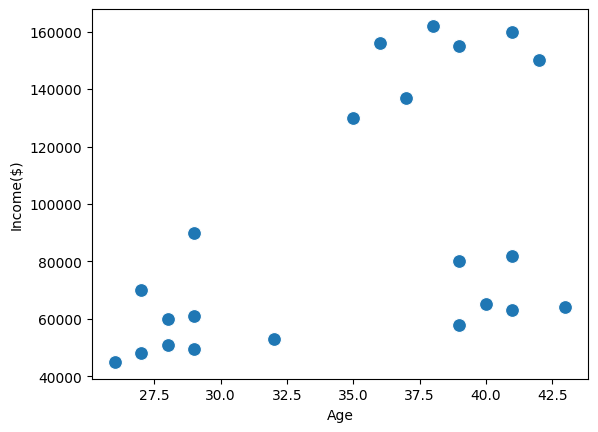

In [3]:
sns.scatterplot(df, x="Age", y="Income($)", s=100)
plt.show()

In [4]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage='average')
hc.fit(df[["Age", "Income($)"]])
hc.labels_


array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int64)

In [6]:
df["cluster"] = hc.labels_
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


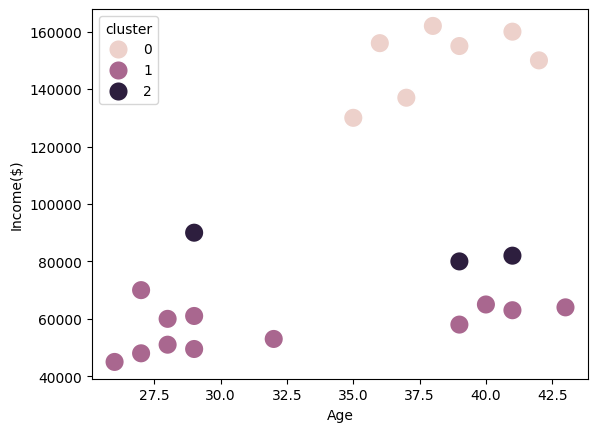

In [8]:
sns.scatterplot(df, x="Age", y="Income($)", s=200, hue='cluster')
plt.show()

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X = df[["Age", "Income($)"]]
Z = linkage(X, method="average")
Z

array([[2.00000000e+00, 3.00000000e+00, 1.00000050e+03, 2.00000000e+00],
       [1.70000000e+01, 1.80000000e+01, 1.00000200e+03, 2.00000000e+00],
       [5.00000000e+00, 8.00000000e+00, 1.00000450e+03, 2.00000000e+00],
       [1.30000000e+01, 1.40000000e+01, 1.50000033e+03, 2.00000000e+00],
       [1.60000000e+01, 2.30000000e+01, 1.50000237e+03, 3.00000000e+00],
       [1.90000000e+01, 2.00000000e+01, 2.00000100e+03, 2.00000000e+00],
       [6.00000000e+00, 7.00000000e+00, 2.00000225e+03, 2.00000000e+00],
       [1.20000000e+01, 2.50000000e+01, 2.25000075e+03, 3.00000000e+00],
       [2.10000000e+01, 2.20000000e+01, 2.50002346e+03, 3.00000000e+00],
       [1.50000000e+01, 2.90000000e+01, 3.50000260e+03, 4.00000000e+00],
       [2.60000000e+01, 3.00000000e+01, 4.33335070e+03, 6.00000000e+00],
       [1.10000000e+01, 3.10000000e+01, 5.37500094e+03, 5.00000000e+00],
       [2.40000000e+01, 2.80000000e+01, 5.50000098e+03, 4.00000000e+00],
       [9.00000000e+00, 1.00000000e+01, 7.00000029e

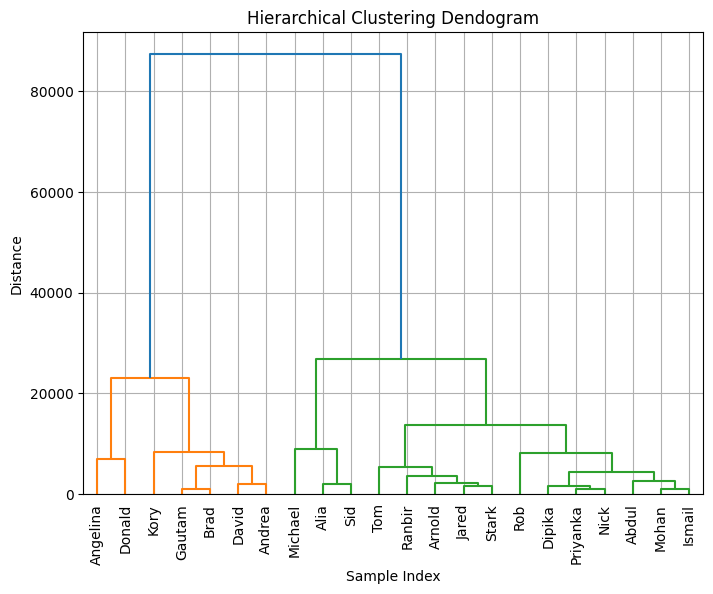

In [13]:
#plot the dendogram
plt.figure(figsize=(8,6))
plt.title("Hierarchical Clustering Dendogram")
dendrogram(Z, labels=df["Name"].values, leaf_rotation=90, leaf_font_size=10)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid()
plt.show()

In [14]:
clusters = fcluster(Z, t=3, criterion='maxclust')
clusters

array([3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3],
      dtype=int32)